<a href="https://colab.research.google.com/github/rishavnitjsr/tumor_detection/blob/main/TumorDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/BrainTumor'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/BrainTumor/Testing/no_tumor/image(71).jpg
/content/drive/MyDrive/BrainTumor/Testing/no_tumor/image(13).jpg
/content/drive/MyDrive/BrainTumor/Testing/no_tumor/image(24).jpg
/content/drive/MyDrive/BrainTumor/Testing/no_tumor/image(38).jpg
/content/drive/MyDrive/BrainTumor/Testing/no_tumor/image(78).jpg
/content/drive/MyDrive/BrainTumor/Testing/no_tumor/image(59).jpg
/content/drive/MyDrive/BrainTumor/Testing/no_tumor/image(44).jpg
/content/drive/MyDrive/BrainTumor/Testing/no_tumor/image(32).jpg
/content/drive/MyDrive/BrainTumor/Testing/no_tumor/image(39).jpg
/content/drive/MyDrive/BrainTumor/Testing/no_tumor/image(80).jpg
/content/drive/MyDrive/BrainTumor/Testing/no_tumor/image(51).jpg
/content/drive/MyDrive/BrainTumor/Testing/no_tumor/image(89).jpg
/content/drive/MyDrive/BrainTumor/Testing/no_tumor/image(96).jpg
/content/drive/MyDrive/BrainTumor/Testing/no_tumor/image(72).jpg
/content/drive/MyDrive/BrainTumor/Testing/no_tumor/image(95).jpg
/content/drive/MyDrive/Br

In [ ]:
import os
import cv2
from sklearn.metrics import accuracy_score, confusion_matrix,  precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing import image
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import itertools

In [ ]:
# Load data
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

In [ ]:
# Load training data
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/BrainTumor/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

In [ ]:
# Load testing data
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/BrainTumor/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

In [ ]:
# Convert lists to numpy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
# Data Overview
print("Total number of images:", len(X_train))
print("Shape of images array:", X_train.shape)
print("Number of unique classes:", len(np.unique(Y_train)))

Total number of images: 3264
Shape of images array: (3264, 150, 150, 3)
Number of unique classes: 4


In [ ]:
from collections import Counter

# Count the occurrences of each unique class label
class_counts = Counter(Y_train)

# Print the class counts
for class_label, count in class_counts.items():
    print(f"Class {class_label}: {count} occurrences")

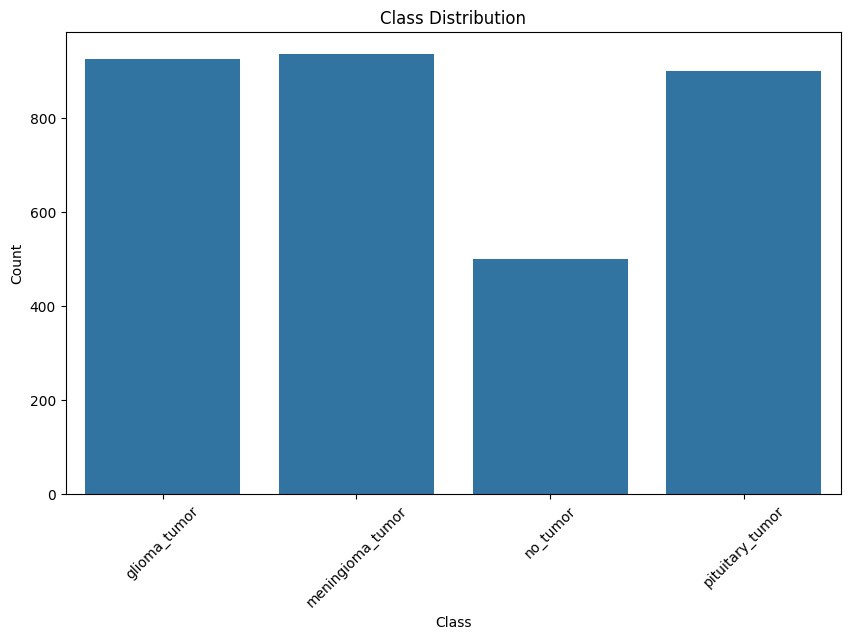

In [ ]:
# Class Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=Y_train)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Shuffle data
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)

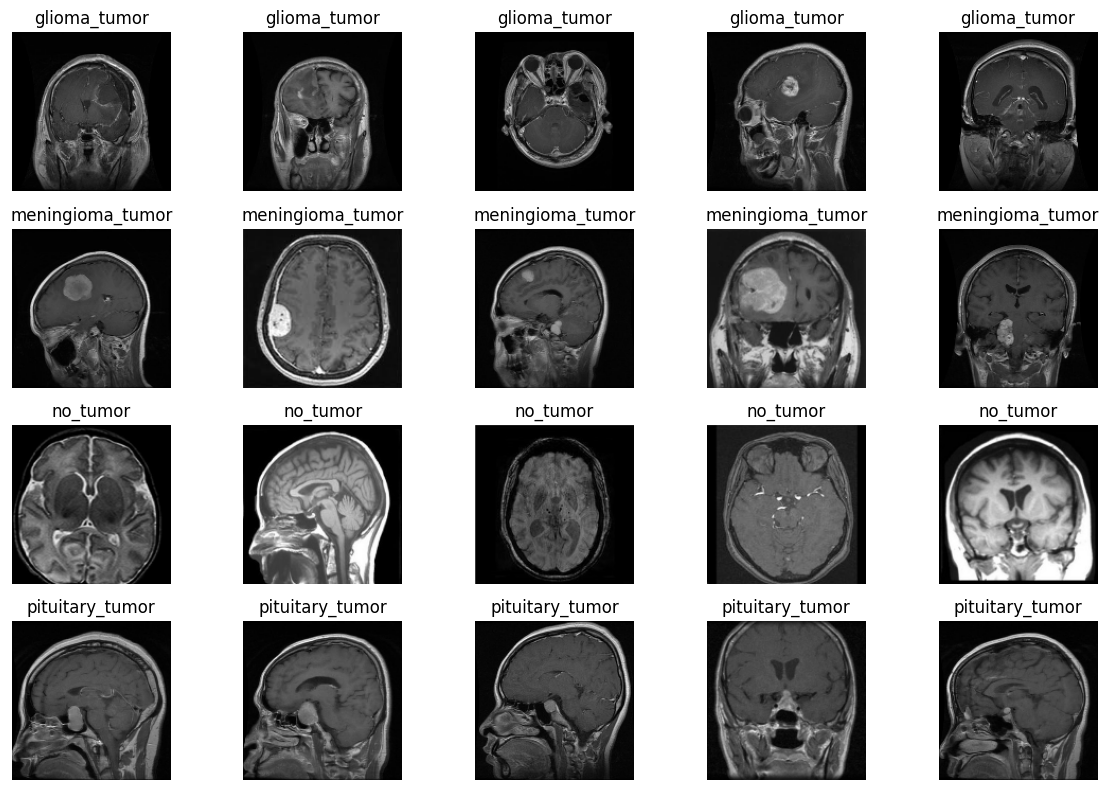

In [ ]:
# Image Visualization
plt.figure(figsize=(12, 8))
for i, tumor_type in enumerate(labels):
    tumor_images = X_train[Y_train == tumor_type]
    for j in range(5):  # Displaying 5 sample images per class
        plt.subplot(4, 5, i * 5 + j + 1)
        plt.imshow(tumor_images[j])
        plt.title(tumor_type)
        plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=101)

In [ ]:
# Convert labels to categorical
y_train_new = [labels.index(i) for i in y_train]
y_train = tf.keras.utils.to_categorical(y_train_new)

y_test_new = [labels.index(i) for i in y_test]
y_test = tf.keras.utils.to_categorical(y_test_new)

In [ ]:
# Define the model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1)

Epoch 1/100
74/74 [==============================] - 11s 102ms/step - loss: 1.8287 - accuracy: 0.2912 - val_loss: 1.3641 - val_accuracy: 0.2901
Epoch 2/100
74/74 [==============================] - 7s 98ms/step - loss: 1.2613 - accuracy: 0.3980 - val_loss: 1.1081 - val_accuracy: 0.5229
Epoch 3/100
74/74 [==============================] - 7s 97ms/step - loss: 1.0462 - accuracy: 0.5351 - val_loss: 1.0098 - val_accuracy: 0.5344
Epoch 4/100
74/74 [==============================] - 7s 94ms/step - loss: 0.9188 - accuracy: 0.6003 - val_loss: 0.9401 - val_accuracy: 0.5954
Epoch 5/100
74/74 [==============================] - 7s 97ms/step - loss: 0.8694 - accuracy: 0.6356 - val_loss: 0.9911 - val_accuracy: 0.5573
Epoch 6/100
74/74 [==============================] - 7s 93ms/step - loss: 0.7848 - accuracy: 0.6603 - val_loss: 0.7722 - val_accuracy: 0.6374
Epoch 7/100
74/74 [==============================] - 7s 96ms/step - loss: 0.7242 - accuracy: 0.6914 - val_loss: 0.8991 - val_accuracy: 0.6221
Epoc

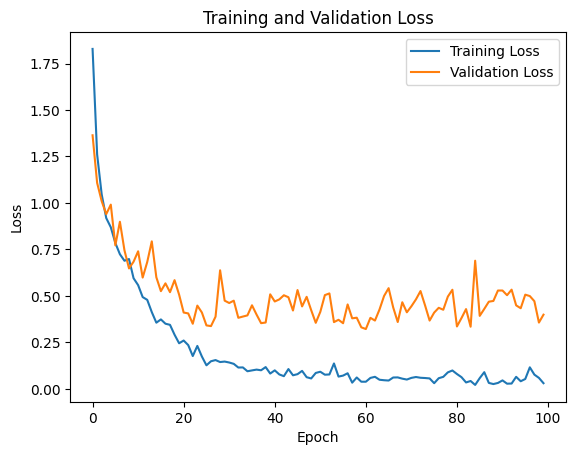

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


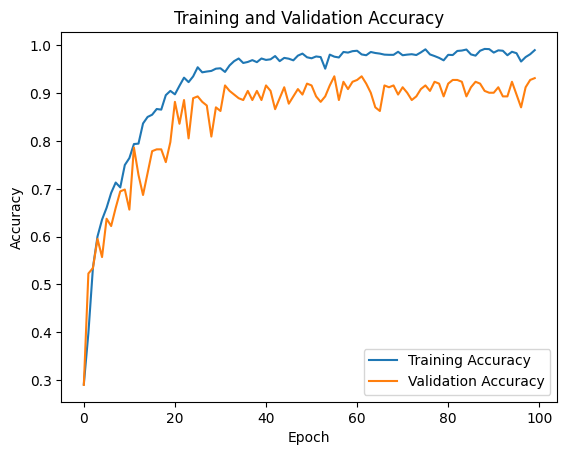

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Predictions for training data
train_probabilities = model.predict(X_train)
train_predictions = np.argmax(train_probabilities, axis=1)

# Predictions for testing data
test_probabilities = model.predict(X_test)
test_predictions = np.argmax(test_probabilities, axis=1)

# Metrics for training data
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), train_predictions)
train_precision = precision_score(np.argmax(y_train, axis=1), train_predictions, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), train_predictions, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), train_predictions, average='weighted')

print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1)

# Metrics for testing data
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), test_predictions)
test_precision = precision_score(np.argmax(y_test, axis=1), test_predictions, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), test_predictions, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), test_predictions, average='weighted')

print("Testing Accuracy:", test_accuracy)
print("Testing Precision:", test_precision)
print("Testing Recall:", test_recall)
print("Testing F1 Score:", test_f1)


21/21 [==============================] - 0s 17ms/step
Training Accuracy: 0.9919571045576407
Training Precision: 0.9920338657680418
Training Recall: 0.9919571045576407
Training F1 Score: 0.9919591462201899
Testing Accuracy: 0.9326186830015314
Testing Precision: 0.9327964589683486
Testing Recall: 0.9326186830015314
Testing F1 Score: 0.9325843318305227


In [ ]:
# Predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

21/21 [==============================] - 0s 17ms/step


In [ ]:
# Confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

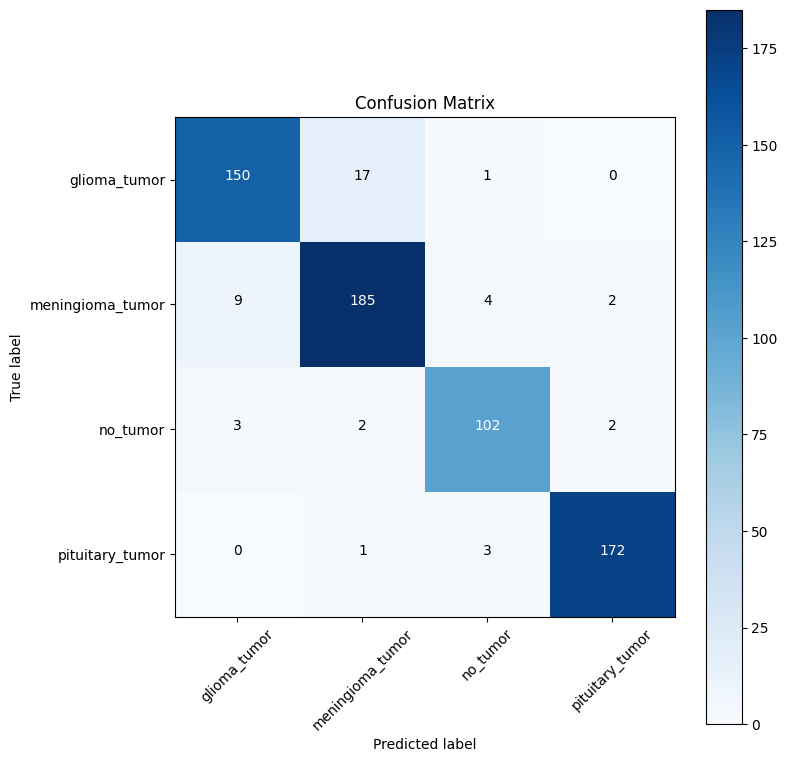

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Predict input image
img = cv2.imread('/content/drive/MyDrive/BrainTumor/Training/glioma_tumor/gg (101).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array = img_array.reshape(1,150,150,3)

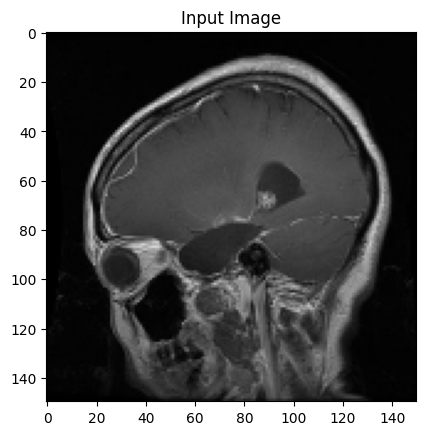

In [ ]:
# Display input image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Input Image')
plt.show()

In [ ]:
# Predict class of input image
predicted_class = model.predict(img_array)[0]
predicted_label = labels[np.argmax(predicted_class)]
accuracy = np.max(model.predict(img_array)) * 100

1/1 [==============================] - 0s 17ms/step


In [ ]:
print(f"The predicted class of the input image is: {predicted_label}")
print(f"The accuracy of prediction is: {accuracy:.2f}%")

The predicted class of the input image is: glioma_tumor
The accuracy of prediction is: 100.00%
